This notebook reads in peak parameters from a file and runs an experiment.

## Imports

In [1]:
import pathlib

from xrdfit.spectrum_fitting import PeakParams, FitExperiment, peak_params_from_dict
import yaml

import analysis_functions as analysis

%load_ext autoreload
%autoreload 2

## Run a single refinement

User inputs:

In [21]:
# to load Diamond 2017 data
# config_path = "../yaml/adc_065_TI64_NDload_900C_15mms_00001_params.yaml"
config_path = "../yaml/desy_2020_experiment18b_stage_5.yaml"
# config_path = "../yaml/desy_2020_experiment16.yaml"
config = analysis.get_config(config_path)

In [22]:
data_file = config["data_file"]
print("The path to the data file is: ", data_file, sep='\n', end='\n\n')

first_cake_angle = config["first_cake_angle"]
print("The angle of the first cake is: ", first_cake_angle, sep='\n', end='\n\n')

cakes_to_fit = config["cakes_to_fit"]
print("The cakes chosen for the fitting are: ", cakes_to_fit, sep='\n', end='\n\n')

frame_time = config["frame_time"]
print("The frame time is: ", frame_time, sep='\n', end='\n\n')

merge_cakes = config["merge_cakes"]
if merge_cakes:
    print("Cakes WILL be merged.", sep='\n', end='\n\n')
if not merge_cakes:
    print("Cakes WILL NOT be merged.", sep='\n', end='\n\n')

reuse_fits = config["reuse_fits"]
if reuse_fits:
    print("Fits WILL be reused.", sep='\n', end='\n\n')
if not reuse_fits:
    print("Fits WILL NOT be reused", sep='\n', end='\n\n')

frame_max = config["frame_max"]
print("The maximum frame number is: ", frame_max, sep='\n', end='\n\n')

frame_interval = config["frame_interval"]

if frame_interval:
    print("Frame intervals ARE being used for the heating, deformation and cooling stages.", end='\n\n')
    
    deform_start = config["deform_start"]
    print("The deformation starts at frame number: ", deform_start, sep='\n', end='\n\n')

    deform_end = config["deform_end"]
    print("The deformation ends at frame number: ", deform_end, sep='\n', end='\n\n')
    
    frame_interval_initial = config["frame_interval_initial"]
    print("The frame interval during heating is: ", frame_interval_initial, sep='\n', end='\n\n')          

    frame_interval_deform = config["frame_interval_deform"]
    print("The frame interval during deformation is: ", frame_interval_deform, sep='\n', end='\n\n')  

    frame_interval_end =  config["frame_interval_end"]
    print("The frame interval during cooling is: ", frame_interval_end, sep='\n', end='\n\n')
    
    # define which frames to fit
    initial_steps = list(range(1, deform_start, frame_interval_initial))
    deform_steps = list(range(deform_start, deform_end, frame_interval_deform))
    end_steps = list(range(deform_end, frame_max, frame_interval_end))
    frames_to_fit = initial_steps + deform_steps + end_steps
    
if not frame_interval:
    print("Frame intervals ARE NOT being used.", end='\n\n')
    frames_to_fit = list(range(1,frame_max,1))

peak_params = peak_params_from_dict(config['peak_params'])
print("The peak parameters are: ", peak_params, sep='\n', end='\n\n')

experiment = FitExperiment(frame_time, data_file, first_cake_angle, cakes_to_fit, 
                           peak_params, merge_cakes, frames_to_fit)

# reuse fits for multiple peaks
experiment.run_analysis(reuse_fits)

The path to the data file is: 
../../../SXRD_analysis/desy_2020/experiment18b-deformation/caking/Ti64_Rolled_TD_Compress_910C_1-00s-1_Multi-Hit_Temp_Cycl_4Cs-1_810_Cool_4Cs-1_b_5-{:05d}.dat

The angle of the first cake is: 
90

The cakes chosen for the fitting are: 
[72, 1, 2, 36, 37, 38]

The frame time is: 
0.1

Cakes WILL NOT be merged.

Fits WILL be reused.

The maximum frame number is: 
2275

Frame intervals ARE NOT being used.

The peak parameters are: 
[<PeakParams((2.67, 2.95), maxima: ['(10-10)'])>, maxima bounds: [(2.67, 2.95)])]

Processing 2274 diffraction patterns.


  0%|          | 0/2274 [00:00<?, ?it/s]

Analysis complete.
The following fits took over 500 fitting iterations. The quality of these fits should be checked.
3.9% of fits for peak (10-10)


Check the fittings:

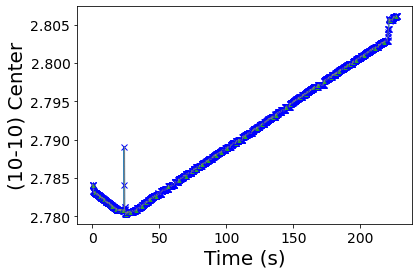

In [23]:
show_points = True
experiment.plot_fit_parameter("(10-10)", "(10-10)_center", show_points)
experiment.plot_fit_parameter("(0002)", "(0002)_center", show_points)
experiment.plot_fit_parameter("(110)", "(110)_center", show_points)
experiment.plot_fit_parameter("(10-11)", "(10-11)_center", show_points)
experiment.plot_fit_parameter("(10-12)", "(10-12)_center", show_points)
experiment.plot_fit_parameter("(200)", "(200)_center", show_points)
experiment.plot_fit_parameter("(11-20)", "(11-20)_center", show_points)
experiment.plot_fit_parameter("(10-13)", "(10-13)_center", show_points)
# experiment.plot_fit_parameter("(211)", "(211)_center", show_points)
experiment.plot_fit_parameter("(20-20)", "(20-20)_center", show_points)
experiment.plot_fit_parameter("(11-22)", "(11-22)_center", show_points)
experiment.plot_fit_parameter("(20-21)", "(20-21)_center", show_points)
experiment.plot_fit_parameter("(0004)", "(0004)_center", show_points)
experiment.plot_fit_parameter("(220)", "(220)_center", show_points)
experiment.plot_fit_parameter("(20-22)", "(20-22)_center", show_points)

In [ ]:
experiment.save("../example_analysis/experiment_fits/065_xrdfit.dump")

## Run multiple refinements

In [19]:
param_list = pathlib.Path("../yaml/").glob("*.yaml")

for experiment_params in param_list:
    print(experiment_params)

../yaml/._ideal_file_type.yaml
../yaml/adc_065_TI64_NDload_900C_15mms_00001_params.yaml
../yaml/ideal_file_type.yaml
../yaml/._adc_065_TI64_NDload_900C_15mms_00001_params.yaml
